In [5]:
from keras.datasets import mnist

In [2]:
from keras.models import Sequential
from keras.layers.core import Dense , Activation
from keras.utils import np_utils

In [3]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

In [4]:
# x_train contains 60,000 28*28 pixel images
# x_test contains 10,000 
# reshape each sample as 784 pixel long array rather than two dimenssional array
x_train = x_train.reshape(60000 , 784)
x_test = x_test.reshape(10000 , 784)

In [5]:
#one-hot encode (10 entry)
# vector comprised of zeros and one 1 
# that corresponds to digit 
# for example [0 , 0 , 0 , 0 ,1 , 0 , 0 ,0 ,0 ,0 ,0] this corresponds to 4
#conversly our network will have 10 output neurons
classes = 10
y_train = np_utils.to_categorical(y_train , classes)
y_test = np_utils.to_categorical(y_test , classes)

In [6]:
#before calling our main function , 
#set the size of the input layer ,
# hidden neurons , the number of epochs to tarin the network and batch size
input_size = 784
batch_size = 100
hidden_neurons = 100
epochs = 100


In [7]:
# in this case we will use sequential model 
# where each layer serves as an input to the next 
# Dense means fully connected layers 
# one hidden layer , sigmoid activation func , and soft max output
model = Sequential([
    Dense(hidden_neurons , input_dim= input_size),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')])

In [8]:
#cost funt and optimization
#cross entropy and stocastic gradient decent
# default values for learning rate , momentum etc
model.compile(loss='categorical_crossentropy' , 
             metrics=['accuracy'] , optimizer='sgd')

In [9]:
# train the network
# with fit method
model.fit(x_train , y_train ,batch_size=batch_size ,epochs=epochs, verbose=1)

Epoch 1/100
600/600 [==============================] - 2s 2ms/step - loss: 0.9496 - accuracy: 0.7635
Epoch 2/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4922 - accuracy: 0.8833
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3937 - accuracy: 0.9015
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3466 - accuracy: 0.9104
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.3172 - accuracy: 0.9157
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2926 - accuracy: 0.9230
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2721 - accuracy: 0.9272
Epoch 8/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2583 - accuracy: 0.9298
Epoch 9/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2476 - accuracy: 0.9324
Epoch 10/100
600/600 [==============================] - 2s 4ms/step - loss: 0.2373 - accura

In [10]:
#evaluate network accuracy on test data
score = model.evaluate(x_test , y_test , verbose=1)
print('Test accuracy: ' , score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1197 - accuracy: 0.9644
Test accuracy:  0.9643999934196472


In [11]:
weights = model.layers[0].get_weights()

<Figure size 640x480 with 0 Axes>

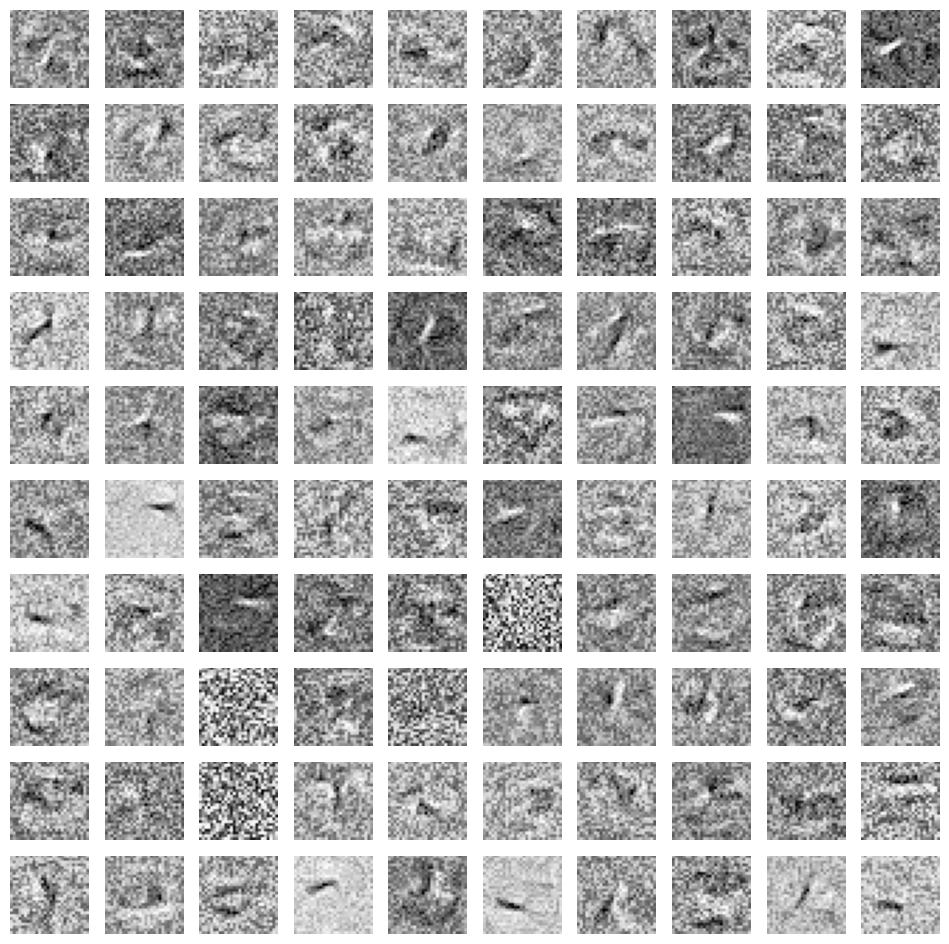

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import numpy as np
fig = plt.figure()
fig = plt.figure(figsize=(12, 12))
w = weights[0].T
for neuron in range(hidden_neurons):
    ax = fig.add_subplot(10 , 10 ,neuron +1)
    ax.axis("off")
    ax.imshow(np.reshape(w[neuron] , (28, 28)) , cmap=cm.Greys_r)
plt.savefig("neuron_images.png" , dpi=300)
plt.show()